In [1]:
import geopandas as gpd

In [3]:
gdf = gpd.read_file("data/shapefiles/tl_2019_us_aiannh copy/tl_2019_us_aiannh.shp")

In [5]:
exposures = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

<Axes: >

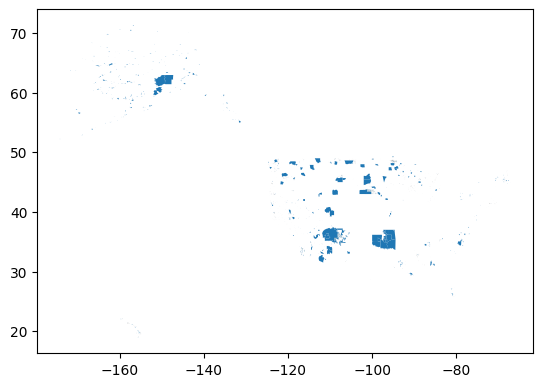

In [7]:
gdf.plot()

In [8]:
overlap = gpd.overlay(gdf, exposures, how='intersection')

/Users/anatrisovic/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_71296/1102674503.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 15024 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  overlap = gpd.overlay(gdf, exposures, how='intersection')


<Axes: >

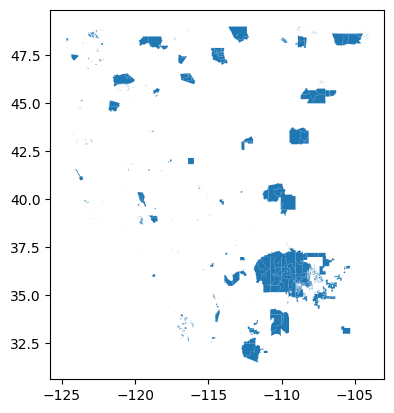

In [58]:
overlap.plot()

<Axes: >

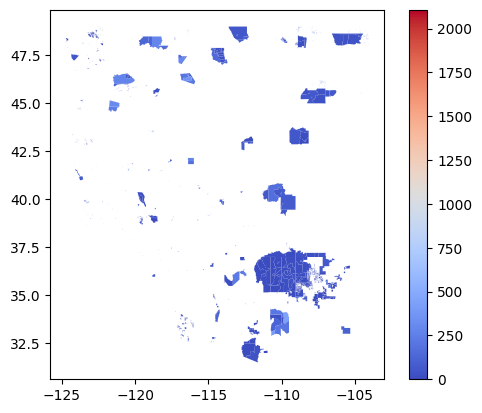

In [15]:
overlap.plot(
    column='wfday',
    legend=True,
    cmap='coolwarm'
)

In [20]:
overlap['wfday'].mean()

40.77844712182062

In [24]:
gdf1 = gdf
gdf2 = exposures

In [25]:
# Check for invalid geometries in both GeoDataFrames
gdf1_invalid = gdf1[~gdf1.is_valid]
gdf2_invalid = gdf2[~gdf2.is_valid]

# Fix invalid geometries
gdf1['geometry'] = gdf1['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)
gdf2['geometry'] = gdf2['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)

In [27]:
gdf1['geometry'] = gdf1['geometry'].simplify(tolerance=0.001)
gdf2['geometry'] = gdf2['geometry'].simplify(tolerance=0.001)

In [31]:
diff = gpd.overlay(gdf2, gdf1, how='difference')

/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_71296/2375395473.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 61 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  diff = gpd.overlay(gdf2, gdf1, how='difference')


<Axes: >

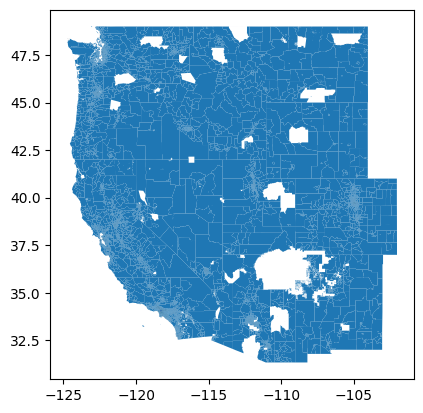

In [57]:
diff.plot()

In [47]:
from helper_400 import get_var_name

In [48]:
get_var_name('ws')

'wildfire-smoke'

In [51]:
overlap["STATE"].unique()

array(['California', 'Montana', 'Nevada', 'New Mexico', 'Washington',
       'Oregon', 'Arizona', 'Idaho', 'Colorado', 'Utah', 'Wyoming'],
      dtype=object)

In [52]:
diff = diff[diff["STATE"] != "Texas"]

In [53]:
diff["STATE"].unique()

array(['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
      dtype=object)

In [59]:
def get_stats():
    print(
            f"| Average Exposure Per Census Tract | Tribal Land in WUS | Non-tribal Land in WUS |\n| --- | --- | --- |"
        )

    for exposure in ["ws",
        "hw",
        "hs",
        "hws",
        "wfday",
        "hs5",
        "hws5",
        "ws5",
        "heatday",
        "smoke_pm_non_zero",
        "smoke_pm_gt_five",]:
        print(
            f"| {get_var_name(exposure)} | {overlap[exposure].mean().round(2)} | {diff[exposure].mean().round(2)} |"
        )

In [60]:
get_stats()

| Average Exposure Per Census Tract | Tribal Land in WUS | Non-tribal Land in WUS |
| --- | --- | --- |
| wildfire-smoke | 18.02 | 2.41 |
| heat-wildfire | 1.46 | 0.17 |
| heat-smoke | 34.89 | 31.67 |
| heat-wildfire-smoke | 1.14 | 0.13 |
| wildfire | 40.78 | 6.37 |
| heat-smoke (over 5 μg/m³) | 12.62 | 12.16 |
| heat-wildfire-smoke (over 5 μg/m³) | 0.63 | 0.07 |
| wildfire-smoke (over 5 μg/m³) | 7.44 | 1.06 |
| heat | 98.7 | 110.89 |
| wildfire smoke | 492.43 | 398.86 |
| wildfire smoke (over 5 μg/m³) | 139.5 | 133.69 |


| Exposure | Tribal Land in WUS | Non-tribal Land in WUS |
|---|---|---|
| wildfire-smoke | 18.02 | 2.41 |
| heat-wildfire | 1.46 | 0.17 |
| heat-smoke | 34.89 | 31.67 |
| heat-wildfire-smoke | 1.14 | 0.13 |
| wildfire | 40.78 | 6.37 |
| heat-smoke (over 5 μg/m³) | 12.62 | 12.16 |
| heat-wildfire-smoke (over 5 μg/m³) | 0.63 | 0.07 |
| wildfire-smoke (over 5 μg/m³) | 7.44 | 1.06 |
| heat | 98.7 | 110.89 |
| wildfire smoke | 492.43 | 398.86 |
| wildfire smoke (over 5 μg/m³) | 139.5 | 133.69 |

In [61]:
diff = diff[diff["wfday"] > 0]
overlap = overlap[overlap["wfday"] > 0]

get_stats()

| Average Exposure Per Census Tract | Tribal Land in WUS | Non-tribal Land in WUS |
| --- | --- | --- |
| wildfire-smoke | 24.39 | 10.13 |
| heat-wildfire | 1.98 | 0.73 |
| heat-smoke | 37.97 | 34.79 |
| heat-wildfire-smoke | 1.54 | 0.54 |
| wildfire | 55.18 | 26.82 |
| heat-smoke (over 5 μg/m³) | 13.97 | 13.56 |
| heat-wildfire-smoke (over 5 μg/m³) | 0.86 | 0.3 |
| wildfire-smoke (over 5 μg/m³) | 10.07 | 4.47 |
| heat | 97.72 | 98.09 |
| wildfire smoke | 551.29 | 514.59 |
| wildfire smoke (over 5 μg/m³) | 156.23 | 171.28 |
